#Exploratory Data Analysis

In the cells below, I generate a :
* Complaint Count per Component
* Complaint Length Distribution
* Number of Incidents Over Time
* Most Frequent Words
* Wordclouds per component

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from wordcloud import WordCloud

# Mount Drive and load wrangled dataset
from google.colab import drive
drive.mount('/content/drive')

# Load wrangled dataset
df = pd.read_csv('/content/drive/MyDrive/vehicle-complaints-project/complaints_wrangled.csv')
print("Data shape:", df.shape)
df.head()

Mounted at /content/drive
Data shape: (147422, 17)


,odiNumber,manufacturer,crash,fire,numberOfInjuries,numberOfDeaths,dateOfIncident,dateComplaintFiled,vin,components,summary,products,make,model,modelYear,cleaned summary,label
0,10713088,"Kia America, Inc.",False,False,0,0,04/24/2015,04/27/2015,5XYPH4A15GG,structure,"traveling at highway speed, the windshield see...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",KIA,SORENTO,2016,traveling at highway speed the windshield seem...,7
1,10713503,"ALUMA TOWER COMPANY, INC",False,True,0,0,04/28/2015,04/29/2015,1YGAE1629GB,electrical system,tl* the contact owns a 2016 aluma ae716ta trai...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",ALUMA,AE716TA,2016,tl the contact owns a aluma aeta trailer na wh...,1
2,10715078,"Kia America, Inc.",False,False,0,0,04/30/2015,05/07/2015,NaN,steering,"while traveling at highway speeds, the sorento...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",KIA,SORENTO,2016,while traveling at highway speeds the sorento ...,6
3,10721462,"Kia America, Inc.",False,False,0,0,05/24/2015,05/26/2015,5XYPKDA1XGG,vehicle speed control,tl* the contact owns a 2016 kia sorento. while...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",KIA,SORENTO,2016,tl the contact owns a kia sorento while drivin...,8
4,10725192,Mazda Motor Corp.,False,False,0,0,04/15/2015,06/15/2015,NaN,visibility/wiper,"glass cracked from top, middle portion of wind...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",MAZDA,CX-5,2016,glass cracked from top middle portion of winds...,9


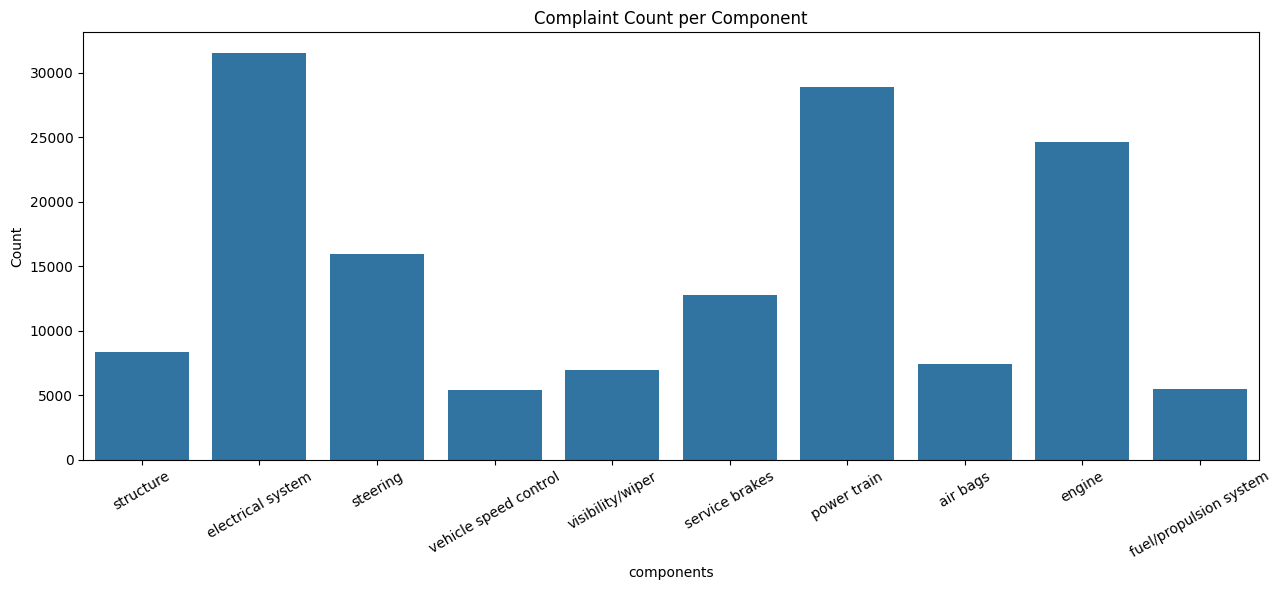

In [3]:
# Number of complaints per vehicle components type (complain count analysis)
plt.figure(figsize=(13, 6))
sns.countplot(data=df, x='components')
plt.xticks(rotation=30)
plt.title("Complaint Count per Component")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Average Complaint Length:  101.50956437980763


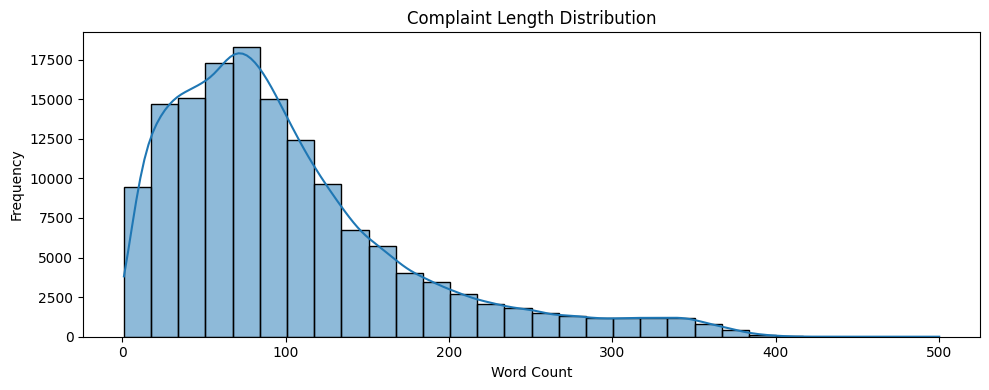

In [4]:
# Complaint Lenght analysis
# adding a column for number of words in summary
df["word_count"] = df["cleaned summary"].apply(lambda x: len(str(x).split()))
print("Average Complaint Length: ", df["word_count"].mean())

# plotting
plt.figure(figsize=(10,4))
sns.histplot(data=df['word_count'], bins=30, kde=True)
plt.title('Complaint Length Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

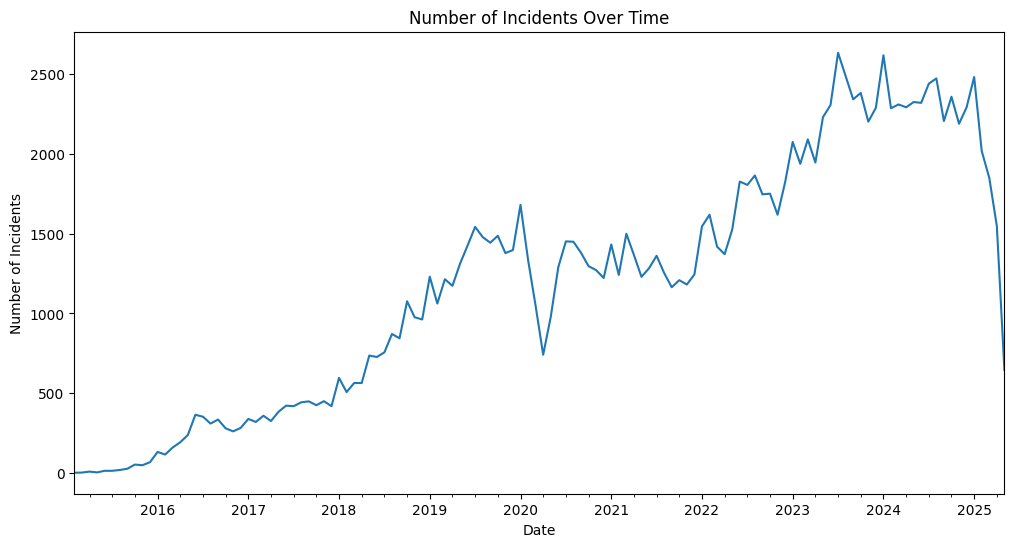

In [14]:
# Time-Series Analysis
df['timestamp'] = pd.to_datetime(df['dateOfIncident'])
df['incident_year'] = df['date'].dt.year
df['incident_month'] = df['date'].dt.to_period('M')

incidents_over_time = df.groupby('incident_month').size()
plt.figure(figsize=(12, 6))
incidents_over_time.plot()
plt.title('Number of Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.show()

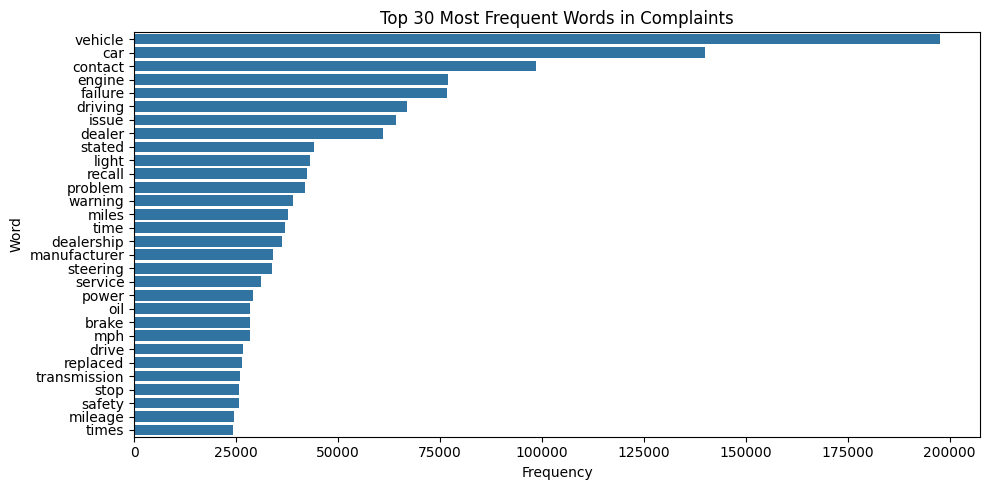

In [5]:
# Finding out most common words in the summaries (frequent words analysis)
from sklearn.feature_extraction.text import CountVectorizer

# drop nan values
df = df.dropna(subset=['cleaned summary'])
df = df.reset_index(drop=True)

# Using CountVectorizer to get the top words
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned summary'])

word_freq = np.asarray(X.sum(axis=0)).flatten()
word_list = vectorizer.get_feature_names_out()
word_counts = pd.Series(word_freq, index=word_list).sort_values(ascending=False)

# want to see top 30 words
top_n = 30
top_word_counts = word_counts.head(top_n)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_word_counts.values, y=top_word_counts.index)
plt.title("Top 30 Most Frequent Words in Complaints")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

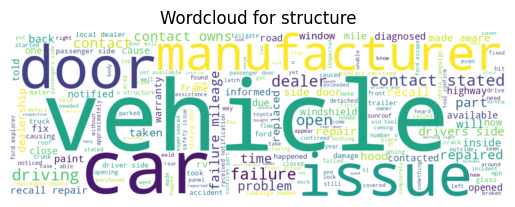

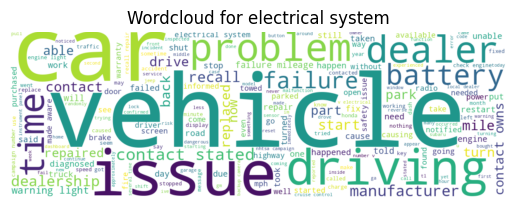

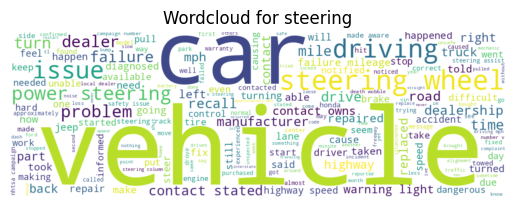

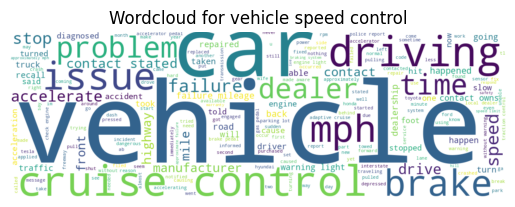

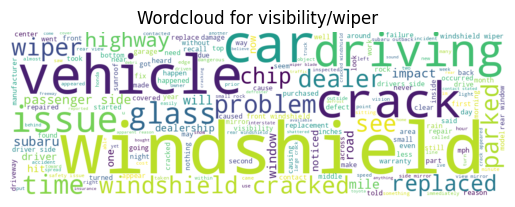

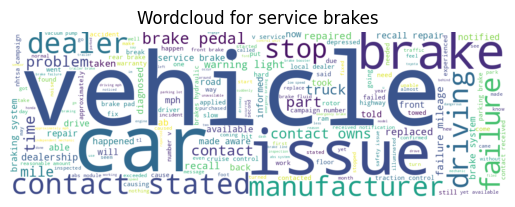

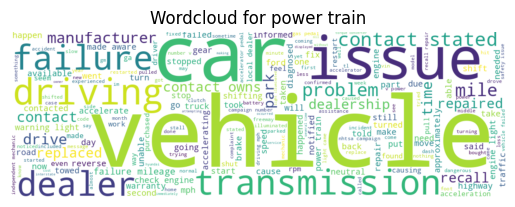

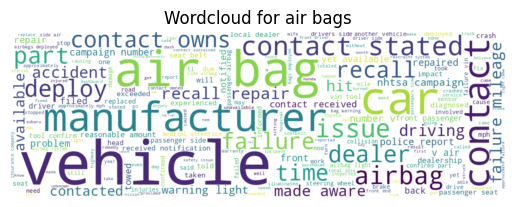

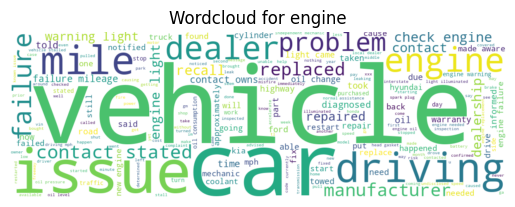

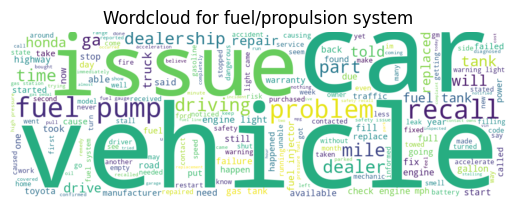

In [11]:
# Wordcloud per component
for component in df["components"].unique():
  text = ' '.join(df[df["components"] == component]["cleaned summary"])
  wordcloud = WordCloud(width=1200, height=400, background_color='white').generate(text)

  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title("Wordcloud for {component}".format(component=component))
  plt.axis("off")
  plt.show()